In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.25),
    transforms.RandomVerticalFlip(p=0.25),
    transforms.RandomRotation(degrees=(0, 180)),
    ToTensor()
])

In [ ]:
torch.manual_seed(42)

train_data = torchvision.datasets.CIFAR10(
    root='CIFAR10/train',
    train=True,
    download=True,
    #transform=train_transform
    transform=ToTensor()
)

test_data = torchvision.datasets.CIFAR10(
    root='CIFAR10/test',
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_data, test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: CIFAR10/train
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: CIFAR10/test
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
train_data.classes, len(train_data.classes)

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 10)

(-0.5, 31.5, 31.5, -0.5)

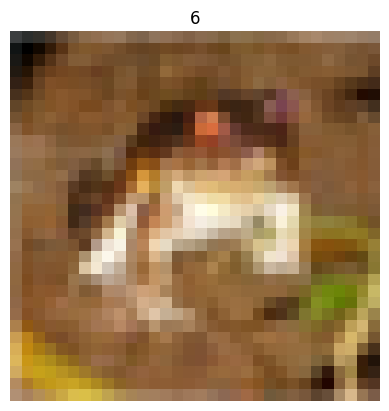

In [ ]:
image, label = train_data[0]

image = image.permute(1, 2, 0)
plt.imshow(image.squeeze())
plt.title(label)
plt.axis("off")

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(42)

train_loader = DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_data,
    shuffle=False
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7c183c6ced70>,
 <torch.utils.data.dataloader.DataLoader at 0x7c183c9fbeb0>)

In [ ]:
len(train_loader), len(test_loader)

(782, 10000)

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape, example_targets.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [ ]:
# VERSION 1
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5), # 10 x 28 x 28
            nn.MaxPool2d(kernel_size=2), # 10 x 14 x 14
            nn.ReLU()
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3), # 10 x 12 x 12
            nn.MaxPool2d(kernel_size=2), # 10 x 6 x 6
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 10 x 6 x 6 = 360
            nn.Linear(in_features=360, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5), # 10 x 28 x 28\n            nn.MaxPool2d(kernel_size=2), # 10 x 14 x 14\n            nn.ReLU()\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3), # 10 x 12 x 12\n            nn.MaxPool2d(kernel_size=2), # 10 x 6 x 6\n            nn.ReLU()\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 10 x 6 x 6 = 360\n            nn.Linear(in_features=360, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n        x = self.block_2(x)\n        x = self.classifier(x)\n        return x\n'

In [ ]:
# VERSION 2
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3), # 10 x 30 x 30
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=3), # 16 x 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 16 x 14 x 14
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=3), # 10 x 12 x 12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 10 x 6 x 6
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 10 x 6 x 6 = 360
            nn.Linear(in_features=360, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3), # 10 x 30 x 30\n            nn.ReLU(),\n            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=3), # 16 x 28 x 28\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 16 x 14 x 14\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=3), # 10 x 12 x 12\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 10 x 6 x 6\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 10 x 6 x 6 = 360\n            nn.Linear(in_features=360, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n        x = self.block_2(x)\n        x = self.classifier(x)\n        return x\n'

In [ ]:
# VERSION 3
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=28, kernel_size=5, padding=2), # 28 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 28 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=28, out_channels=28, kernel_size=3), # 28 x 14 x 14
            nn.ReLU(),
            nn.Conv2d(in_channels=28, out_channels=28, kernel_size=3), # 28 x 12 x 12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 28 x 6 x 6
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 28 x 6 x 6
            nn.Linear(in_features=28*6*6, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32\n            nn.ReLU(),\n            nn.Conv2d(in_channels=16, out_channels=28, kernel_size=5, padding=2), # 28 x 32 x 32\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 28 x 16 x 16\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=28, out_channels=28, kernel_size=3), # 28 x 14 x 14\n            nn.ReLU(),\n            nn.Conv2d(in_channels=28, out_channels=28, kernel_size=3), # 28 x 12 x 12\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 28 x 6 x 6\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 28 x 6 x 6\n            nn.Linear(in_features=28*6*6, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n       

In [ ]:
# VERSION 4
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 32 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 14 x 14
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3), # 64 x 12 x 12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 6 x 6
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 64 x 6 x 6
            nn.Linear(in_features=64*6*6, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32\n            nn.ReLU(),\n            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 32 x 16 x 16\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 14 x 14\n            nn.ReLU(),\n            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3), # 64 x 12 x 12\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 64 x 6 x 6\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 64 x 6 x 6\n            nn.Linear(in_features=64*6*6, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n       

In [ ]:
# VERSION 5
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3), # 16 x 30 x 30
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), # 32 x 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 32 x 14 x 14
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 12 x 12
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3), # 64 x 10 x 10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 5 x 5
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 64 x 5 x 5
            nn.Linear(in_features=64*5*5, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3), # 16 x 30 x 30\n            nn.ReLU(),\n            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), # 32 x 28 x 28\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 32 x 14 x 14\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 12 x 12\n            nn.ReLU(),\n            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3), # 64 x 10 x 10\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 64 x 5 x 5\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 64 x 5 x 5\n            nn.Linear(in_features=64*5*5, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n        x = self.block_2(x)\n

In [ ]:
# Version 6:
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 32 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 14 x 14
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), # 128 x 12 x 12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 128 x 6 x 6
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 128 x 6 x 6
            nn.Linear(in_features=128*6*6, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2), # 16 x 32 x 32\n            nn.ReLU(),\n            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 32 x 16 x 16\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 64 x 14 x 14\n            nn.ReLU(),\n            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), # 128 x 12 x 12\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 128 x 6 x 6\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 128 x 6 x 6\n            nn.Linear(in_features=128*6*6, out_features=10)\n        )\n\n    def forward(self, x: torch.Tensor):\n        x = self.block_1(x)\n  

In [ ]:
# Version 7: Overfitting
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 8 x 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 256 x 4 x 4
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 256 x 4 x 4
            nn.Linear(in_features=256*4*4, out_features=1024),
            nn.ReLU(),
            #nn.Linear(in_features=1024, out_features=256),
            #nn.ReLU(),
            nn.Linear(in_features=1024, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8\n            nn.ReLU(),\n            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 8 x 8\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 256 x 4 x 4\n        )\n        self.classifier = nn.Sequential(\n            nn.Flatten(), # 256 x 4 x 4\n            nn.Linear(in_features=256*4*4, out_features=1024),\n      

In [ ]:
# version 8

"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4
            #nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 4 x 4
            #nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2) # 256 x 2 x 2
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 128 x 4 x 4
            nn.Linear(in_features=128*4*4, out_features=1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.Dropout(0.35),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16\n            nn.Dropout(0.35),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8\n            nn.Dropout(0.35),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4\n            #nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 4 x 4\n            #nn.ReLU(),\n            #nn.MaxPool2d(kernel_size=2) # 256 x 2 x 2\n        )\n 

In [ ]:
# Version 9
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.Dropout(0.35),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16
            nn.Dropout(0.35),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8
            nn.Dropout(0.35),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4
            #nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 4 x 4
            #nn.Dropout(0.35),
            #nn.BatchNorm2d(256),
            #nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2) # 256 x 2 x 2
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 128 x 4 x 4
            nn.Linear(in_features=128*4*4, out_features=1024),
            #nn.BatchNorm1d(1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=1024),
            #nn.BatchNorm1d(1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(32),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16\n            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2), # 64 x 16 x 16\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(64),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(128),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4\n            #nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2), # 256 x 

In [ ]:
# Version 10: VGG
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1), # 32 x 32 x 32
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), # 32 x 32 x 32
            nn.Dropout(0.35),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # 64 x 16 x 16
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1), # 64 x 16 x 16
            nn.Dropout(0.35),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1), # 128 x 8 x 8
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1), # 128 x 8 x 8
            nn.Dropout(0.35),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 128 x 4 x 4
            nn.Linear(in_features=128*4*4, out_features=1024),
            #nn.BatchNorm1d(1024),
            #nn.Dropout(0.35),
            #nn.ReLU(),
            #nn.Linear(in_features=1024, out_features=1024),
            #nn.BatchNorm1d(1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        return x
"""

In [ ]:
# Version 11:
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1), # 32 x 32 x 32
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), # 32 x 32 x 32
            nn.Dropout(0.35),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # 64 x 16 x 16
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1), # 64 x 16 x 16
            nn.Dropout(0.35),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 64 x 8 x 8
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1), # 96 x 8 x 8
            nn.Conv2d(in_channels=96, out_channels=96, kernel_size=3, padding=1), # 96 x 8 x 8
            nn.Dropout(0.35),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 96 x 4 x 4
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 64 x 8 x 8
            nn.Linear(in_features=64*8*8, out_features=1024),
            #nn.BatchNorm1d(1024),
            #nn.Dropout(0.35),
            #nn.ReLU(),
            #nn.Linear(in_features=1024, out_features=1024),
            #nn.BatchNorm1d(1024),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        #x = self.block_3(x)
        x = self.classifier(x)
        return x

In [ ]:
torch.manual_seed(42)

network = CNN()
network

CNN(
  (block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Dropout(p=0.35, inplace=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Dropout(p=0.35, inplace=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=network.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.005)

from helper_functions import accuracy_fn

In [ ]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # 1. forward pass
        y_pred = model(X)

        # 2. cal loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. optimizer 0 grad
        optimizer.zero_grad()

        # 4. loss back
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 100 == 0:
            train_loss_batch = train_loss / (batch + 1)
            train_acc_batch = train_acc / (batch + 1)
            print(f"Train batch: {batch + 1} | Train loss: {train_loss_batch:.5f} | Train acc: {train_acc_batch:.5f}")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")

In [ ]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn):

    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

            if batch % 1000 == 0:
                test_loss_batch = test_loss / (batch + 1)
                test_acc_batch = test_acc / (batch + 1)
                print(f"Test batch: {batch + 1} | Test loss: {test_loss_batch:.5f} | Test acc: {test_acc_batch:.5f}")

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}\n")

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 25

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_step(model=network,
              data_loader=train_loader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn)

    test_step(model=network,
             data_loader=test_loader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0
Train batch: 1 | Train loss: 2.31102 | Train acc: 17.18750
Train batch: 101 | Train loss: 2.05301 | Train acc: 25.21658
Train batch: 201 | Train loss: 1.88757 | Train acc: 31.65423
Train batch: 301 | Train loss: 1.79194 | Train acc: 34.97197
Train batch: 401 | Train loss: 1.72649 | Train acc: 37.34024
Train batch: 501 | Train loss: 1.67454 | Train acc: 39.35566
Train batch: 601 | Train loss: 1.63118 | Train acc: 40.81999
Train batch: 701 | Train loss: 1.59363 | Train acc: 42.43046
Train loss: 1.56363 | Train acc: 43.51822
Test batch: 1 | Test loss: 1.37498 | Test acc: 100.00000
Test batch: 1001 | Test loss: 1.59166 | Test acc: 50.64935
Test batch: 2001 | Test loss: 1.59009 | Test acc: 50.72464
Test batch: 3001 | Test loss: 1.59075 | Test acc: 51.08297
Test batch: 4001 | Test loss: 1.58624 | Test acc: 51.28718
Test batch: 5001 | Test loss: 1.57930 | Test acc: 51.94961
Test batch: 6001 | Test loss: 1.58487 | Test acc: 51.45809
Test batch: 7001 | Test loss: 1.59078 | Test acc: 51

KeyboardInterrupt: 